In [1]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Download historical data for a stock
import yfinance as yf
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


In [4]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Display cleaned data
data.head()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200


In [5]:
# Calculate Moving Averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Calculate Daily Returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate Volatility (Standard Deviation of Daily Returns)
data['Volatility'] = data['Daily Return'].rolling(window=30).std()

# Drop rows with NaN values (due to rolling calculations)
data = data.dropna()

# Display preprocessed data
data.head()

Price,Close,High,Low,Open,Volume,MA50,MA200,Daily Return,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-10-15,117.704178,118.181974,115.207927,115.763733,112559200,114.007473,86.176186,-0.003961,0.032251
2020-10-16,116.056252,118.523258,115.851482,118.259977,115393800,114.111272,86.392887,-0.014001,0.028834
2020-10-19,113.091942,117.421375,112.779911,116.972830,120639300,114.206198,86.598301,-0.025542,0.029205
2020-10-20,114.583862,116.017259,112.750672,113.306478,124423700,114.299467,86.808306,0.013192,0.026472
2020-10-21,113.959793,115.753971,113.550246,113.764769,89946000,114.445634,87.016897,-0.005446,0.025493


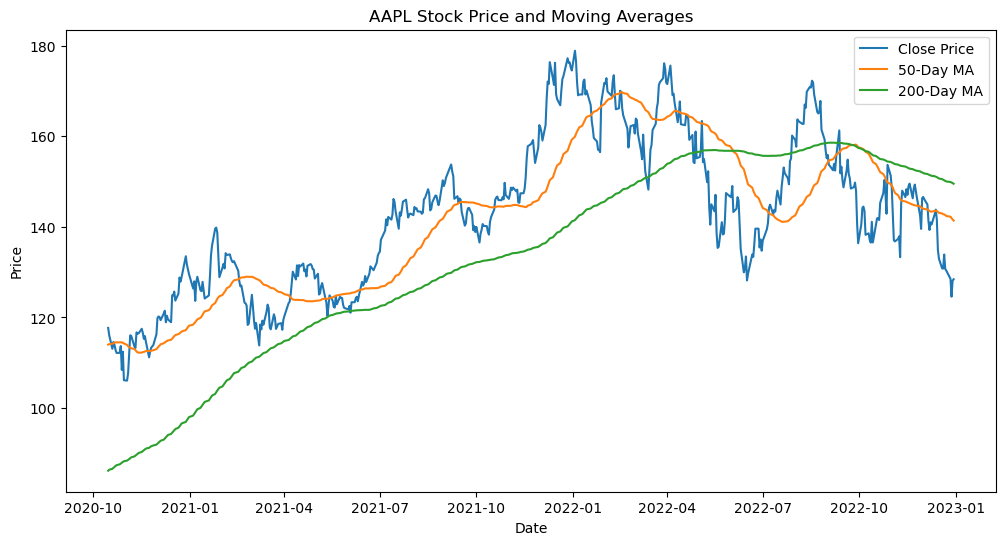

In [6]:
# Plot Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

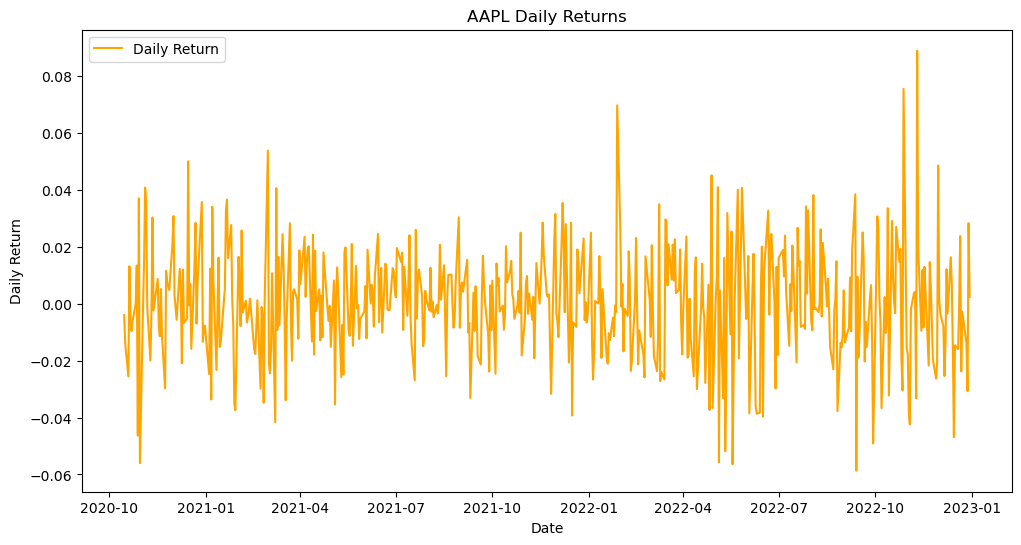

In [7]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Return'], label='Daily Return', color='orange')
plt.title(f'{ticker} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

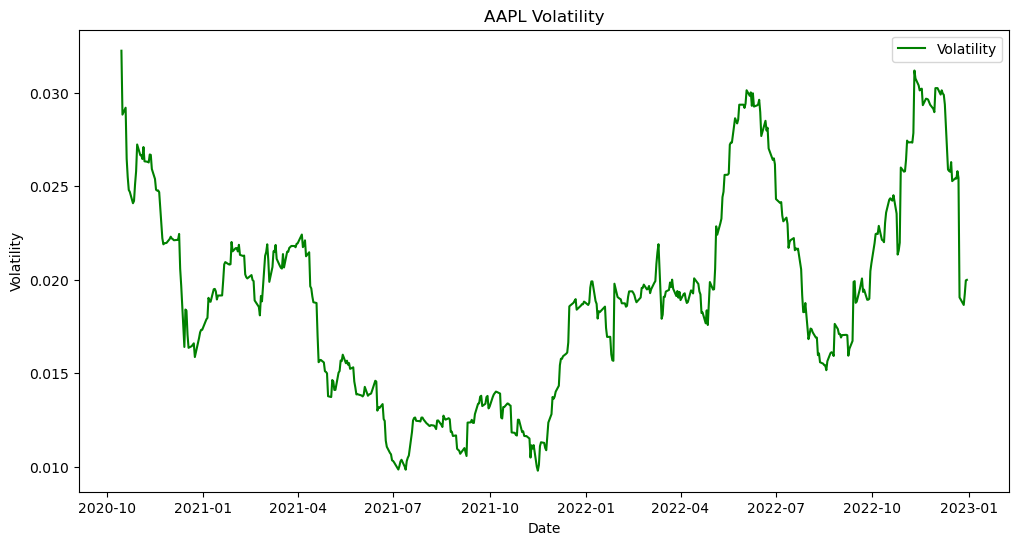

In [8]:
# Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='Volatility', color='green')
plt.title(f'{ticker} Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

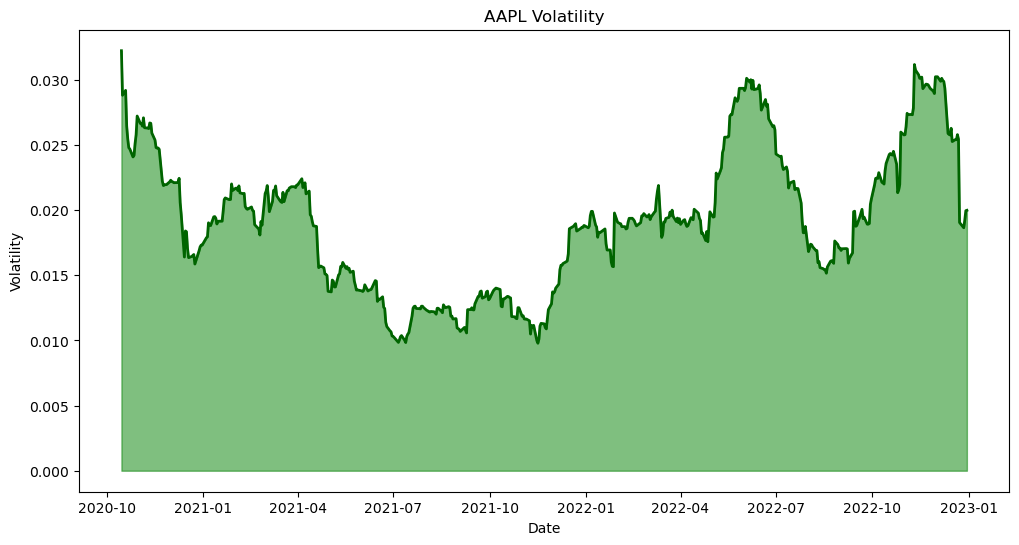

In [9]:
plt.figure(figsize=(12, 6))
plt.fill_between(data.index, data['Volatility'], color='green', alpha=0.5)
plt.plot(data.index, data['Volatility'], color='darkgreen', linewidth=2)

plt.title(f'{ticker} Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

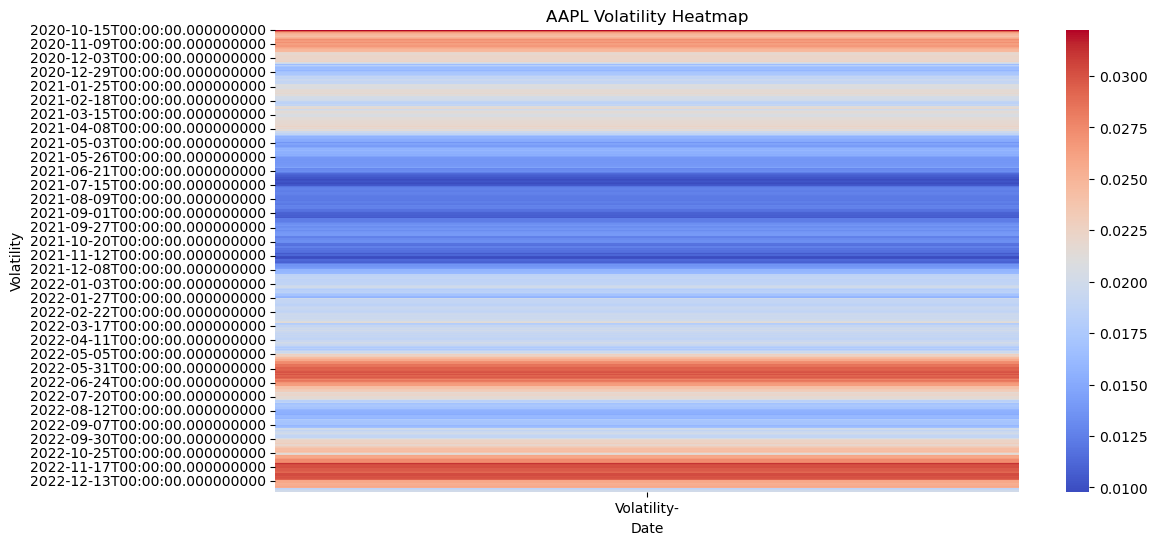

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data[['Volatility']], cmap='coolwarm', annot=False)
plt.title(f'{ticker} Volatility Heatmap')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


In [11]:
# Create target variable: 1 if price goes up, 0 if price goes down
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Drop the last row (since it has no target value)
data = data[:-1]

In [12]:
# Define features and target
features = ['Close', 'MA50', 'MA200', 'Daily Return', 'Volatility']
X = data[features]
y = data['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.59        55
           1       0.59      0.51      0.55        57

    accuracy                           0.57       112
   macro avg       0.57      0.57      0.57       112
weighted avg       0.57      0.57      0.57       112



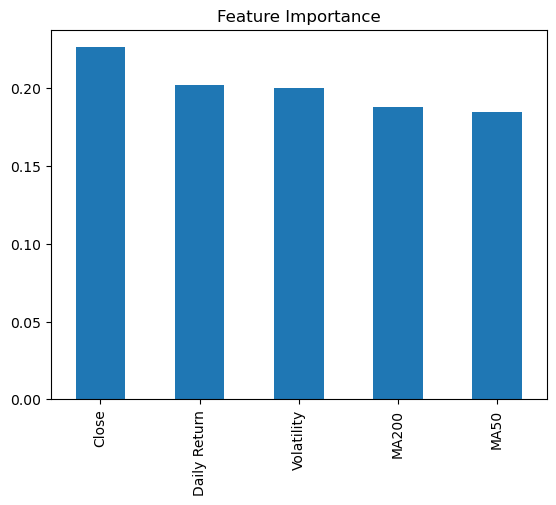

In [15]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [16]:
# Comments
print("""
Comments:
- The model predicts whether the stock price will go up or down based on historical data.
- Feature importance shows which factors (e.g., Moving Averages, Volatility) are most influential.
- The accuracy and classification report provide insights into the model's performance.
- Use this as a supplementary tool for investment decisions, not as the sole decision-making factor.
""")


Comments:
- The model predicts whether the stock price will go up or down based on historical data.
- Feature importance shows which factors (e.g., Moving Averages, Volatility) are most influential.
- The accuracy and classification report provide insights into the model's performance.
- Use this as a supplementary tool for investment decisions, not as the sole decision-making factor.



# Interface

In [18]:
!pip install streamlit

In [19]:
!python -m pip install --upgrade pip

In [20]:
!pip install gradio

In [21]:
import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Function to get stock data and preprocess
def get_stock_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    if data.empty:
        return None
    
    # Calculate Moving Averages, Daily Returns, and Volatility
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    data['Daily Return'] = data['Close'].pct_change()
    data['Volatility'] = data['Daily Return'].rolling(window=30).std()
    data.dropna(inplace=True)
    
    # Create target variable
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    data = data[:-1]
    
    return data[['Close', 'MA50', 'MA200', 'Daily Return', 'Volatility', 'Target']]

# Load stock data and train model
def train_model(ticker):
    data = get_stock_data(ticker)
    if data is None:
        return None, None
    
    X = data[['Close', 'MA50', 'MA200', 'Daily Return', 'Volatility']]
    y = data['Target']
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    return model, X.columns

# Prediction function
def predict_stock(ticker, close, ma50, ma200, daily_return, volatility):
    model, features = train_model(ticker)
    if model is None:
        return "Invalid Ticker or No Data Available"
    
    input_data = pd.DataFrame([[close, ma50, ma200, daily_return, volatility]], columns=features)
    prediction = model.predict(input_data)[0]
    return "Price will go UP" if prediction == 1 else "Price will go DOWN"

# Gradio Interface
demo = gr.Interface(
    fn=predict_stock,
    inputs=[
        gr.Textbox(label="Stock Ticker (e.g., AAPL)"),
        gr.Number(label="Closing Price"),
        gr.Number(label="50-Day Moving Average"),
        gr.Number(label="200-Day Moving Average"),
        gr.Number(label="Daily Return"),
        gr.Number(label="Volatility")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Stock Price Prediction",
    description="Enter stock details to predict if the price will go up or down."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# blockchain

In [23]:
!pip install yfinance gradio pandas

In [24]:
# import hashlib
# import json
# import time

# class Blockchain:
#     def __init__(self):
#         self.chain = []
#         self.create_block(previous_hash='0')  # Genesis block

#     def create_block(self, data=None, previous_hash='0'):
#         block = {
#             'index': len(self.chain) + 1,
#             'timestamp': time.time(),
#             'data': data,
#             'previous_hash': previous_hash,
#             'hash': self.hash_block(data, previous_hash)
#         }
#         self.chain.append(block)
#         return block

#     def hash_block(self, data, previous_hash):
#         block_string = json.dumps({'data': data, 'previous_hash': previous_hash}, sort_keys=True)
#         return hashlib.sha256(block_string.encode()).hexdigest()

#     def get_last_block(self):
#         return self.chain[-1] if self.chain else None

# # Initialize Blockchain
# blockchain = Blockchain()


In [25]:
# import yfinance as yf
# import pandas as pd

# def fetch_stock_data(ticker):
#     """Fetch 1-month stock history from Yahoo Finance."""
#     stock = yf.Ticker(ticker)
#     hist = stock.history(period="1mo")
#     return hist

# def analyze_stock(ticker):
#     """Fetch stock data, store key information in blockchain, and return results."""
#     data = fetch_stock_data(ticker)
#     if data.empty:
#         return "Invalid Ticker or No Data Available."

#     last_price = data['Close'].iloc[-1]

#     # Store data in blockchain
#     last_block = blockchain.get_last_block()
#     new_block = blockchain.create_block(data={'ticker': ticker, 'price': last_price}, previous_hash=last_block['hash'])

#     return f"Stock: {ticker}\nLatest Price: {last_price}\nBlockchain Hash: {new_block['hash']}"


In [26]:
# import gradio as gr

# iface = gr.Interface(
#     fn=analyze_stock,
#     inputs="text",
#     outputs="text",
#     title="Blockchain-Secured Stock Analysis",
#     description="Enter a stock ticker (e.g., AAPL) to fetch and analyze data. The result is stored securely on a blockchain."
# )

# iface.launch(share=True)  # Use share=True for external access


In [27]:
pip install web3 yfinance gradio pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Block chain integration with ahshlib

In [29]:
!pip install gradio yfinance pandas numpy scikit-learn hashlib

ERROR: Ignored the following yanked versions: 20081119
ERROR: Could not find a version that satisfies the requirement hashlib (from versions: none)
ERROR: No matching distribution found for hashlib


In [30]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [31]:
import hashlib
print(hashlib.md5(b"test").hexdigest())

098f6bcd4621d373cade4e832627b4f6


In [32]:
!pip install --upgrade pip setuptools

In [33]:
import hashlib
import time

# Blockchain Class
class Blockchain:
    def __init__(self):
        self.chain = []  # List of blocks
        self.create_block(prediction="Genesis Block", previous_hash="0")

    def create_block(self, ticker="", prediction="", previous_hash=""):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time.strftime("%Y-%m-%d %H:%M:%S"),
            'ticker': ticker,
            'prediction': prediction,
            'previous_hash': previous_hash,
            'hash': self.hash_block(ticker, prediction, previous_hash)
        }
        self.chain.append(block)
        return block

    def hash_block(self, ticker, prediction, previous_hash):
        data = f"{ticker}{prediction}{previous_hash}{time.time()}"
        return hashlib.sha256(data.encode()).hexdigest()

    def get_previous_hash(self):
        return self.chain[-1]['hash'] if self.chain else "0"

# Create a blockchain instance
blockchain = Blockchain()

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import gradio as gr

# Prediction function with blockchain storage
def predict_stock(ticker, close, ma50, ma200, daily_return, volatility):
    data = pd.DataFrame([[close, ma50, ma200, daily_return, volatility]],
                        columns=['Close', 'MA50', 'MA200', 'Daily Return', 'Volatility'])

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    prediction = model.fit(data, [1]).predict(data)[0]
    prediction_text = "Price will go UP" if prediction == 1 else "Price will go DOWN"

    # Store prediction in blockchain
    prev_hash = blockchain.get_previous_hash()
    new_block = blockchain.create_block(ticker, prediction_text, prev_hash)

    return f"{prediction_text} (Stored in Blockchain: Block #{new_block['index']})"

# Gradio Interface
demo = gr.Interface(
    fn=predict_stock,
    inputs=[
        gr.Textbox(label="Stock Ticker (e.g., AAPL)"),
        gr.Number(label="Closing Price"),
        gr.Number(label="50-Day Moving Average"),
        gr.Number(label="200-Day Moving Average"),
        gr.Number(label="Daily Return"),
        gr.Number(label="Volatility")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Stock Price Prediction with Blockchain",
    description="Enter stock details to predict price movement. Prediction is securely stored in a local blockchain."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [35]:
import gradio as gr
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import hashlib
import time

# ----------------- Blockchain Setup -----------------
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(prediction="Genesis Block", previous_hash="0")

    def create_block(self, ticker="", prediction="", previous_hash=""):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time.strftime("%Y-%m-%d %H:%M:%S"),
            'ticker': ticker,
            'prediction': prediction,
            'previous_hash': previous_hash,
            'hash': self.hash_block(ticker, prediction, previous_hash)
        }
        self.chain.append(block)
        return block

    def hash_block(self, ticker, prediction, previous_hash):
        data = f"{ticker}{prediction}{previous_hash}{time.time()}"
        return hashlib.sha256(data.encode()).hexdigest()

    def get_previous_hash(self):
        return self.chain[-1]['hash'] if self.chain else "0"

# Create blockchain instance
blockchain = Blockchain()

# ----------------- Authentication Setup -----------------
# Simple username-password dictionary
users = {
    "admin": "1234",   # you can add more users like "user1": "pass123"
    "demo": "demo"
}

# Login Function
def login(username, password):
    if username in users and users[username] == password:
        return gr.update(visible=True), gr.update(visible=False), "Login successful!"
    else:
        return gr.update(visible=False), gr.update(visible=True), "Invalid credentials. Try again."

# ----------------- Stock Prediction -----------------
def predict_stock(ticker, close, ma50, ma200, daily_return, volatility):
    data = pd.DataFrame([[close, ma50, ma200, daily_return, volatility]],
                        columns=['Close', 'MA50', 'MA200', 'Daily Return', 'Volatility'])

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    prediction = model.fit(data, [1]).predict(data)[0]
    prediction_text = "Price will go UP" if prediction == 1 else "Price will go DOWN"

    # Store prediction in blockchain
    prev_hash = blockchain.get_previous_hash()
    new_block = blockchain.create_block(ticker, prediction_text, prev_hash)

    return f"{prediction_text} (Stored in Blockchain: Block #{new_block['index']})"

# ----------------- Gradio UI -----------------
with gr.Blocks() as demo:
    login_status = gr.Textbox(label="Status", interactive=False)

    with gr.Row(visible=True) as login_row:
        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")
        login_button = gr.Button("Login")

    with gr.Column(visible=False) as dashboard:
        gr.Markdown("## Stock Price Prediction with Blockchain")

        ticker_input = gr.Textbox(label="Stock Ticker (e.g., AAPL)")
        close_input = gr.Number(label="Closing Price")
        ma50_input = gr.Number(label="50-Day Moving Average")
        ma200_input = gr.Number(label="200-Day Moving Average")
        daily_return_input = gr.Number(label="Daily Return")
        volatility_input = gr.Number(label="Volatility")
        predict_button = gr.Button("Predict")
        prediction_output = gr.Textbox(label="Prediction")

        predict_button.click(
            predict_stock,
            inputs=[ticker_input, close_input, ma50_input, ma200_input, daily_return_input, volatility_input],
            outputs=prediction_output
        )

    login_button.click(
        login,
        inputs=[username, password],
        outputs=[dashboard, login_row, login_status]
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
